## Getting libraries and data

In [7]:
import numpy as np
import pandas as pd
import requests

import matplotlib.pyplot as plt
# import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [8]:
# getting data from excel sheet

df_vol= pd.read_excel('.\datasets\Vol Basic run on 29Oct Sample.xlsx')
df_vol.head(10)

,Date_Joined,Gender,Nationality,Last 4 digits IC,Date_of_Birth,Age,Postal_Code,Race,Spoken_languages,Interests,...,Current_Employment_Status,Employer_Name,Designation,Status,Status_Remarks,Registration_Date,Membership_Type,Membership_Start_Date,Membership_Expiry_Date,Membership_Payment
0,11-01-2016,Male,NaN,NaN,05-08-1938,81.0,788214.0,Others,"Hokkien,English","Infocomm Related,",...,Retired,ForumEnergy Technologies Pte Ltd,Regional Manager,Inactive,Inactive since June 2017.,22-05-2016,NaN,NaN,NaN,NaN
1,16-05-2002,Female,NaN,0001H,30-07-1941,78.0,572152.0,Chinese,"Cantonese,Hokkien,Teochew,English,Mandarin",NaN,...,Homemaker,K K Hospital,Midwife,Inactive,Status data correction from (Ordinary Member) ...,22-05-2016,Ordinary Member,NaN,30-06-2015,NaN
2,02-02-2016,Male,NaN,0024H,17-06-1963,56.0,161057.0,Chinese,"Cantonese,Hokkien,Teochew,English,Mandarin",NaN,...,"Others, pls",NTUC Fairprice,Retail Assistant,Inactive,Status data correction from (Ordinary Member) ...,22-05-2016,Ordinary Member,NaN,30-06-2016,NaN
3,12-10-2010,Male,Singapore Permanent Resident,0037I,07-12-1935,84.0,570269.0,Chinese,"Cantonese,English,Mandarin",NaN,...,Retired,"Bank Central Asia, Indonesia",Clerk,Active,NaN,22-05-2016,Ordinary Member,25-09-2018,30-06-2019,NaN
4,12-04-2013,Female,Singapore Citizen,0066e,29-07-1952,67.0,100050.0,Chinese,",English","Office Admin.,Snr Guiding,Active Ageing Seniors",...,Retired,Singapore Post Pte Ltd,Part time CSO,Active,NaN,22-05-2016,Ordinary,05-07-2019,30-06-2019,paid
5,25-04-2014,Female,Singapore Citizen,0067I,14-07-1951,68.0,821163.0,Chinese,",English,Thai",NaN,...,Employed,Singapore Soka Association,Singing Coach,Active,NaN,22-05-2016,Ordinary,04-10-2018,30-06-2019,paid
6,26-01-1999,Female,Singapore Citizen,0068H,11-02-1946,73.0,464188.0,Chinese,Chinese,"Befriending,Events Management/Organise Activit...",...,Retired,NaN,NaN,Active,NaN,22-05-2016,Ordinary,08-01-2019,30-06-2019,paid
7,15-04-2008,Female,Singapore Citizen,0072Z,02-04-1937,82.0,310157.0,Chinese,"Cantonese,Hakka,Hokkien,Teochew,English,Mandarin",NaN,...,NaN,NaN,NaN,Active,NaN,22-05-2016,Ordinary,01-07-2018,30-06-2019,paid
8,29-08-2006,Male,Singapore Citizen,0074J,05-08-1951,68.0,670425.0,Chinese,Chinese,NaN,...,Employed,NTUC Income,P/T Insurance Agent,Active,NaN,22-05-2016,Ordinary,01-07-2020,30-06-2021,complimentary
9,04-03-2002,Male,NaN,0081G,12-05-1944,75.0,470605.0,Chinese,"Cantonese,English,Mandarin",NaN,...,NaN,NaN,NaN,Inactive,Status data correction from (Ordinary Member) ...,22-05-2016,Ordinary Member,NaN,30-06-2015,NaN


In [9]:
df_vol['Postal_Code'].isnull().value_counts()

False    4950
True     3335
Name: Postal_Code, dtype: int64

In [10]:
df_vol['Postal_Code']

0       788214.0
1       572152.0
2       161057.0
3       570269.0
4       100050.0
5       821163.0
6       464188.0
7       310157.0
8       670425.0
9       470605.0
10      460096.0
11      575444.0
12      730019.0
13      449292.0
14      578632.0
15      680453.0
16      419112.0
17      310053.0
18      579721.0
19       90013.0
20      159015.0
21           NaN
22      460415.0
23      520419.0
24      808290.0
25      570179.0
26      570292.0
27      807091.0
28      570292.0
29      570292.0
          ...   
8255         NaN
8256         NaN
8257         NaN
8258         NaN
8259         NaN
8260         NaN
8261         NaN
8262         NaN
8263         NaN
8264         NaN
8265         NaN
8266         NaN
8267         NaN
8268         NaN
8269         NaN
8270         NaN
8271         NaN
8272         NaN
8273         NaN
8274         NaN
8275         NaN
8276         NaN
8277         NaN
8278         NaN
8279         NaN
8280         NaN
8281         NaN
8282         N

## Obtaining latitude and longitude from postal code

In [23]:
# obtaining latitude and longitude details from postal code


latitude =[]
longitude = []

def get_lat_long(df):

    add1 = 'https://developers.onemap.sg/commonapi/search?searchVal='
    add2 = '&returnGeom=Y&getAddrDetails=Y&pageNum=1'
    
    for i in df.index:
        print(df['Postal_Code'][i])
        searchval = df['Postal_Code'][i]
        if len(str(searchval))<4:
            latitude.append('')
            longitude.append('')
        else:
            endpoint  = str(add1+str(int(searchval))+add2)
            result = requests.get(endpoint)
            add_details = result.json()
            try:
                lat1 = add_details['results'][0]['LATITUDE']
                long1 = add_details['results'][0]['LONGITUDE']
                latitude.append(lat1)
                longitude.append(long1)
            except:
                latitude.append('')
                longitude.append('')
                
    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,60)
    print(sleep_duration)
    time.sleep(sleep_duration)

                
get_lat_long(df_vol)   



In [12]:
df_vol['Latitude']=pd.Series(latitude)
df_vol['Longitude']= pd.Series(longitude)

In [13]:
df_vol.to_csv('./datasets/location.csv')

## Plotting locations on map

In [14]:
import fiona 
# import geopandas as gpd

# Enable fiona driver
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

# Read file
df = gpd.read_file('./datasets/map/sla-cadastral-land-parcel-kml.kml', driver='KML')

# # Write file
# with fiona.drivers():
#     # Might throw a WARNING - CPLE_NotSupported in b'dataset sample_out.kml does not support layer creation option ENCODING'
#     df.to_file('sample_out.kml', driver='KML')
    
# Drop Z dimension of polygons that occurs often in kml 
import shapely
df.geometry = df.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y, z: (x, y), polygon))

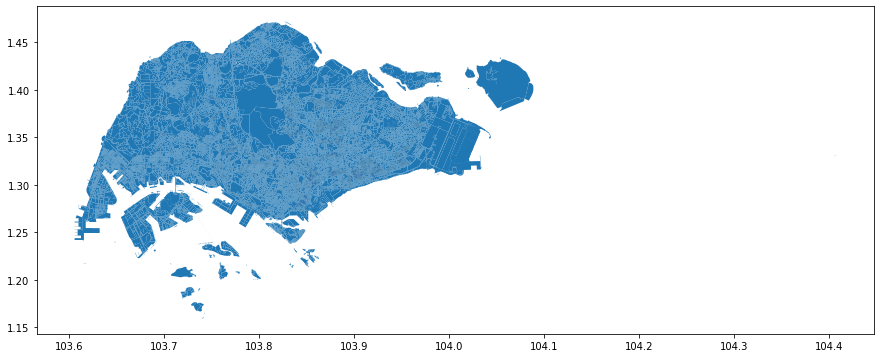

In [15]:
fig,ax = plt.subplots(figsize = (15,20))
df.plot(ax=ax)

In [16]:
df_vol = pd.read_csv('./datasets/location.csv')

In [17]:
df_vol.head()

,Unnamed: 0,Date_Joined,Gender,Nationality,Last 4 digits IC,Date_of_Birth,Age,Postal_Code,Race,Spoken_languages,...,Designation,Status,Status_Remarks,Registration_Date,Membership_Type,Membership_Start_Date,Membership_Expiry_Date,Membership_Payment,Latitude,Longitude
0,0,11-01-2016,Male,NaN,NaN,05-08-1938,81.0,788214.0,Others,"Hokkien,English",...,Regional Manager,Inactive,Inactive since June 2017.,22-05-2016,NaN,NaN,NaN,NaN,1.396587,103.822099
1,1,16-05-2002,Female,NaN,0001H,30-07-1941,78.0,572152.0,Chinese,"Cantonese,Hokkien,Teochew,English,Mandarin",...,Midwife,Inactive,Status data correction from (Ordinary Member) ...,22-05-2016,Ordinary Member,NaN,30-06-2015,NaN,1.345316,103.853985
2,2,02-02-2016,Male,NaN,0024H,17-06-1963,56.0,161057.0,Chinese,"Cantonese,Hokkien,Teochew,English,Mandarin",...,Retail Assistant,Inactive,Status data correction from (Ordinary Member) ...,22-05-2016,Ordinary Member,NaN,30-06-2016,NaN,1.290139,103.828453
3,3,12-10-2010,Male,Singapore Permanent Resident,0037I,07-12-1935,84.0,570269.0,Chinese,"Cantonese,English,Mandarin",...,Clerk,Active,NaN,22-05-2016,Ordinary Member,25-09-2018,30-06-2019,NaN,1.356889,103.842674
4,4,12-04-2013,Female,Singapore Citizen,0066e,29-07-1952,67.0,100050.0,Chinese,",English",...,Part time CSO,Active,NaN,22-05-2016,Ordinary,05-07-2019,30-06-2019,paid,1.273090,103.810144


In [18]:
df_locate = df_vol.copy()
df_locate = df_locate.loc[:,['Last 4 digits IC','Longitude', 'Latitude']]
df_locate = df_locate['Longitude'].dropna()
df_locate.rename({'Last 4 digits IC': 'vol_id'})
df_locate = df_locate.reset_index(drop=True)

In [19]:
df_vol['Longitude'].notnull().sum()

17

In [20]:
len(df_locate)

17

In [25]:
crs = {'init': 'epsg:4326'}
df_locate[['Longitude', 'Latitude']].astype(float)
geometry = [Point(xy) for xy in zip(df_locate['Longitude'], df_locate['Latitude'])]
geometry[:5]

In [ ]:
len(geometry)

In [ ]:
geo_df = gpd.GeoDataFrame(df_locate, crs=crs, geometry=geometry)
geo_df.head()

In [ ]:
fig, ax = plt.subplots(figsize =(15, 20))
df.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 20, color='red', marker = 'o', label = 'Volunteer postal code' )
plt.legend(prop = {'size':15})

- above map shows the location of 4819 volunteers